In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)
tf.random.set_seed(42)


In [3]:
IMAGE_SIZE = (224, 224)
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'


In [4]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)       

In [5]:
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Add a max-pooling layer
model.add(MaxPool2D((2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max-pooling layer
model.add(MaxPool2D((2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max-pooling layer
model.add(MaxPool2D((2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max-pooling layer
model.add(MaxPool2D((2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(256, activation='relu'))

# Add a fully connected layer
model.add(Dense(512, activation='relu'))

# Add the output layer with two classes (change the number of units according to your task)
model.add(Dense(2, activation='softmax'))






#model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
#model.add(MaxPooling2D(2,2))
#model.add(Conv2D(32, (3,3), activation= 'relu'))
#model.add(MaxPooling2D(2,2))
#model.add(Conv2D(64, (3,3), activation= 'relu'))
#model.add(MaxPooling2D(2,2))
#model.add(Conv2D(128, (3,3), activation= 'relu'))
#model.add(MaxPooling2D(2,2))
#model.add(Conv2D(128, (3,3), activation= 'relu'))
#model.add(MaxPooling2D(2,2))
#model.add(Flatten())
#model.add(Dense(256, activation= 'relu'))
#model.add(Dense(512, activation= 'relu'))
#model.add(Dense(1, activation= 'sigmoid'))

In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [8]:
training_set = train_datagen.flow_from_directory(train_path, target_size=IMAGE_SIZE, batch_size=10, class_mode='categorical')
test_set = test_datagen.flow_from_directory(valid_path, target_size=IMAGE_SIZE, batch_size=10, class_mode='categorical')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
model.fit(
    training_set,
    validation_data=test_set,
    epochs=1,  # You can adjust the number of epochs
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)




522/522 [==============================] - 590s 1s/step - loss: 0.3343 - accuracy: 0.8595 - val_loss: 0.4156 - val_accuracy: 0.8109


In [10]:
from keras.preprocessing import image

img = image.load_img('C:/Users/sirik/Desktop/DS Subjects PY/Intro to Cloud Computing py/chest_xray/test/PNEUMONIA/person1_virus_11.jpeg', target_size=IMAGE_SIZE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = x / 255.0  # Normalize the image
classes = model.predict(img_data)
result = int(classes[0][0])
if result == 0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")


1/1 [==============================] - 0s 276ms/step
Person is Affected By PNEUMONIA


1/1 [==============================] - 0s 147ms/step


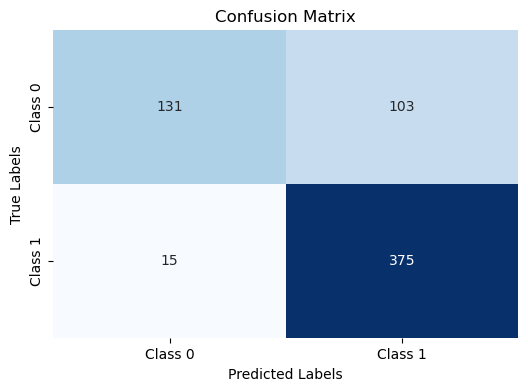

In [11]:
true_labels = []
predicted_labels = []

for i in range(len(test_set)):
    batch = test_set[i]
    images, labels = batch
    predictions = model.predict(images)

    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(predictions, axis=1))

t_labels = np.array(true_labels)
p_labels = np.array(predicted_labels)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])
plt.yticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])
plt.show()


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Finding precision and recall
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy   :", accuracy)
precision = precision_score(true_labels, predicted_labels)
print("Precision :", precision)
recall = recall_score(true_labels, predicted_labels)
print("Recall    :", recall)
F1_score = f1_score(true_labels, predicted_labels)
print("F1-score  :", F1_score)

Accuracy   : 0.8108974358974359
Precision : 0.7845188284518828
Recall    : 0.9615384615384616
F1-score  : 0.8640552995391706


In [13]:
import os

model_dir = "models"
os.makedirs(model_dir, exist_ok=True)

model_version = max([int(i) for i in os.listdir(model_dir) + [0]]) + 1
model.save(f"{model_dir}/{model_version}")

INFO:tensorflow:Assets written to: models/2\assets


INFO:tensorflow:Assets written to: models/2\assets


In [14]:
model.save("../pneumonia.h5")

In [15]:
import joblib

In [16]:
joblib.dump(model, 'trained_cnn_model.joblib')

['trained_cnn_model.joblib']